# **Course 3 Automatidata project**
**Course 3 - Go Beyond the Numbers: Translate Data into Insights**

You are the newest data professional in a fictional data consulting firm: Automatidata. The team is still early into the project, having only just completed an initial plan of action and some early Python coding work. 

Luana Rodriquez, the senior data analyst at Automatidata, is pleased with the work you have already completed and requests your assistance with some EDA and data visualization work for the New York City Taxi and Limousine Commission project (New York City TLC) to get a general understanding of what taxi ridership looks like. The management team is asking for a Python notebook showing data structuring and cleaning, as well as any matplotlib/seaborn visualizations plotted to help understand the data. At the very least, include a box plot of the ride durations and some time series plots, like a breakdown by quarter or month. 

Additionally, the management team has recently asked all EDA to include Tableau visualizations. For this taxi data, create a Tableau dashboard showing a New York City map of taxi/limo trips by month. Make sure it is easy to understand to someone who isn’t data savvy, and remember that the assistant director at the New York City TLC is a person with visual impairments.

A notebook was structured and prepared to help you in this project. Please complete the following questions.

# Course 3 End-of-course project: Exploratory data analysis

In this activity, you will examine data provided and prepare it for analysis. You will also design a professional data visualization that tells a story, and will help data-driven decisions for business needs. 

Please note that the Tableau visualization activity is optional, and will not affect your completion of the course. Completing the Tableau activity will help you practice planning out and plotting a data visualization based on a specific business need. The structure of this activity is designed to emulate the proposals you will likely be assigned in your career as a data professional. Completing this activity will help prepare you for those career moments.

**The purpose** of this project is to conduct exploratory data analysis on a provided data set. Your mission is to continue the investigation you began in C2 and perform further EDA on this data with the aim of learning more about the variables. 
  
**The goal** is to clean data set and create a visualization.
<br/>  
*This activity has 4 parts:*

**Part 1:** Imports, links, and loading

**Part 2:** Data Exploration
*   Data cleaning


**Part 3:** Building visualizations

**Part 4:** Evaluate and share results

<br/> 
Follow the instructions and answer the questions below to complete the activity. Then, you will complete an Executive Summary using the questions listed on the PACE Strategy Document.

Be sure to complete this activity before moving on. The next course item will provide you with a completed exemplar to compare to your own work. 



# **Visualize a story in Tableau and Python**

# **PACE stages** 


<img src="images/Pace.png" width="100" height="100" align=left>

   *        [Plan](#scrollTo=psz51YkZVwtN&line=3&uniqifier=1)
   *        [Analyze](#scrollTo=mA7Mz_SnI8km&line=4&uniqifier=1)
   *        [Construct](#scrollTo=Lca9c8XON8lc&line=2&uniqifier=1)
   *        [Execute](#scrollTo=401PgchTPr4E&line=2&uniqifier=1)

Throughout these project notebooks, you'll see references to the problem-solving framework PACE. The following notebook components are labeled with the respective PACE stage: Plan, Analyze, Construct, and Execute.

<img src="images/Plan.png" width="100" height="100" align=left>


## PACE: Plan 

In this stage, consider the following questions where applicable to complete your code response:
1. Identify any outliers: 


*   What methods are best for identifying outliers?
*   How do you make the decision to keep or exclude outliers from any future models?



Outliers can be identified using IQR
Lower limit and upper limit are 25th percentile - 1.5 * IQR and 75th percentile + 1.5 * IQR

The decisions could be
1. delete them
2. reassign them to lower and upper limits
3. impute them with median

### Task 1. Imports, links, and loading
Go to Tableau Public
The following link will help you complete this activity. Keep Tableau Public open as you proceed to the next steps. 

Link to supporting materials: 
Tableau Public: https://public.tableau.com/s/ 

For EDA of the data, import the data and packages that would be most helpful, such as pandas, numpy and matplotlib. 


In [1]:
# Import packages and libraries
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns 

**Note:** As shown in this cell, the dataset has been automatically loaded in for you. You do not need to download the .csv file, or provide more code, in order to access the dataset and proceed with this lab. Please continue with this activity by completing the following instructions.

In [2]:
# Load dataset into dataframe
df = pd.read_csv('2017_Yellow_Taxi_Trip_Data.csv')

<img src="images/Analyze.png" width="100" height="100" align=left>

## PACE: Analyze 

Consider the questions in your PACE Strategy Document to reflect on the Analyze stage.

### Task 2a. Data exploration and cleaning

Decide which columns are applicable

The first step is to assess your data. Check the Data Source page on Tableau Public to get a sense of the size, shape and makeup of the data set. Then answer these questions to yourself: 

Given our scenario, which data columns are most applicable? 
Which data columns can I eliminate, knowing they won’t solve our problem scenario? 

Consider functions that help you understand and structure the data. 

*    head()
*    describe()
*    info()
*    groupby()
*    sortby()

What do you do about missing data (if any)? 

Are there data outliers? What are they and how might you handle them? 

What do the distributions of your variables tell you about the question you're asking or the problem you're trying to solve?




#### Columns that could be relevant
pickup time, dropoff time, trip_distance, PU location, DO location, RateCodeID, storeandfwd flag, and related to fare amount

#### Missing Data
There are no missing values in the data, if there were missing values then,
* delete rows if few were there
* create a NaN category
* derive representative values based on median or average of non missing values.

#### Outliers
The data for the total amount have outliers with maximum value of 1200 where as mean and std are both at 16. These outliers can be handeled using IQR upper and lower limit rules. Tip column also has outliers.

#### Distributions
The distribution of total amount shows negative minimum values. Also they have outlier max value of about 1200. The mean and std are both at ~16. 75th percentile is at 17.8.
Most rides were of 3 miles or less

Start by discovering, using head and size. 

In [3]:
df.head()

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
0,24870114,2,03/25/2017 8:55:43 AM,03/25/2017 9:09:47 AM,6,3.34,1,N,100,231,1,13.0,0.0,0.5,2.76,0.0,0.3,16.56
1,35634249,1,04/11/2017 2:53:28 PM,04/11/2017 3:19:58 PM,1,1.80,1,N,186,43,1,16.0,0.0,0.5,4.00,0.0,0.3,20.80
2,106203690,1,12/15/2017 7:26:56 AM,12/15/2017 7:34:08 AM,1,1.00,1,N,262,236,1,6.5,0.0,0.5,1.45,0.0,0.3,8.75
3,38942136,2,05/07/2017 1:17:59 PM,05/07/2017 1:48:14 PM,1,3.70,1,N,188,97,1,20.5,0.0,0.5,6.39,0.0,0.3,27.69
4,30841670,2,04/15/2017 11:32:20 PM,04/15/2017 11:49:03 PM,1,4.37,1,N,4,112,2,16.5,0.5,0.5,0.00,0.0,0.3,17.80


In [4]:
df.size-df.shape[0]*df.shape[1]
df.isnull().any().any()

False

Use describe... 

In [5]:
df.describe()

,Unnamed: 0,VendorID,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
count,2.269900e+04,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000
mean,5.675849e+07,1.556236,1.642319,2.913313,1.043394,162.412353,161.527997,1.336887,13.026629,0.333275,0.497445,1.835781,0.312542,0.299551,16.310502
std,3.274493e+07,0.496838,1.285231,3.653171,0.708391,66.633373,70.139691,0.496211,13.243791,0.463097,0.039465,2.800626,1.399212,0.015673,16.097295
min,1.212700e+04,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,-120.000000,-1.000000,-0.500000,0.000000,0.000000,-0.300000,-120.300000
25%,2.852056e+07,1.000000,1.000000,0.990000,1.000000,114.000000,112.000000,1.000000,6.500000,0.000000,0.500000,0.000000,0.000000,0.300000,8.750000
50%,5.673150e+07,2.000000,1.000000,1.610000,1.000000,162.000000,162.000000,1.000000,9.500000,0.000000,0.500000,1.350000,0.000000,0.300000,11.800000
75%,8.537452e+07,2.000000,2.000000,3.060000,1.000000,233.000000,233.000000,2.000000,14.500000,0.500000,0.500000,2.450000,0.000000,0.300000,17.800000
max,1.134863e+08,2.000000,6.000000,33.960000,99.000000,265.000000,265.000000,4.000000,999.990000,4.500000,0.500000,200.000000,19.100000,0.300000,1200.290000


And info. 

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22699 entries, 0 to 22698
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             22699 non-null  int64  
 1   VendorID               22699 non-null  int64  
 2   tpep_pickup_datetime   22699 non-null  object 
 3   tpep_dropoff_datetime  22699 non-null  object 
 4   passenger_count        22699 non-null  int64  
 5   trip_distance          22699 non-null  float64
 6   RatecodeID             22699 non-null  int64  
 7   store_and_fwd_flag     22699 non-null  object 
 8   PULocationID           22699 non-null  int64  
 9   DOLocationID           22699 non-null  int64  
 10  payment_type           22699 non-null  int64  
 11  fare_amount            22699 non-null  float64
 12  extra                  22699 non-null  float64
 13  mta_tax                22699 non-null  float64
 14  tip_amount             22699 non-null  float64
 15  to

### Task 2b. Assess whether dimensions and measures are correct

On the data source page in Tableau, double check the data types for the applicable columns you selected on the previous step. Pay close attention to the dimensions and measures to assure they are correct. 

In Python, consider the data types of the columns. *Consider:* Do they make sense? 

Review the link provided in the previous activity instructions to create the required Tableau visualization. 

### Task 2c. Select visualization type(s)

Select data visualization types that will help you understand and explain the data.

Now that you know which data columns you’ll use, it is time to decide which data visualization makes the most sense for EDA of the TLC dataset. What type of data visualization(s) would be most helpful? 

* Line graph
* Bar chart
* Box plot
* Histogram
* Heat map
* Scatter plot
* A geographic map


Plots like scatter plot, bar graph, histogram, box Plot would be helpful in performing EDA

<img src="images/Construct.png" width="100" height="100" align=left>

## PACE: Construct 

Consider the questions in your PACE Strategy Document to reflect on the Construct stage.

### Task 3. Data visualization

You’ve assessed your data, and decided on which data variables are most applicable. It’s time to plot your visualization(s)!


### Boxplots

Perform a check for outliers on relevant columns such as trip distance and trip duration. Remember, some of the best ways to identify the presence of outliers in data are box plots and histograms. 

**Note:** Remember to convert your date columns to datetime in order to derive total trip duration.  

In [7]:
# Convert data columns to datetime
df.tpep_dropoff_datetime = pd.to_datetime(df.tpep_dropoff_datetime)
df.tpep_pickup_datetime = pd.to_datetime(df.tpep_pickup_datetime)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22699 entries, 0 to 22698
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Unnamed: 0             22699 non-null  int64         
 1   VendorID               22699 non-null  int64         
 2   tpep_pickup_datetime   22699 non-null  datetime64[ns]
 3   tpep_dropoff_datetime  22699 non-null  datetime64[ns]
 4   passenger_count        22699 non-null  int64         
 5   trip_distance          22699 non-null  float64       
 6   RatecodeID             22699 non-null  int64         
 7   store_and_fwd_flag     22699 non-null  object        
 8   PULocationID           22699 non-null  int64         
 9   DOLocationID           22699 non-null  int64         
 10  payment_type           22699 non-null  int64         
 11  fare_amount            22699 non-null  float64       
 12  extra                  22699 non-null  float64       
 13  m

**trip distance**

In [8]:
CB_color_cycle = ['#377eb8', '#ff7f00', '#4daf4a',
                  '#f781bf', '#a65628', '#984ea3',
                  '#999999', '#e41a1c', '#dede00']

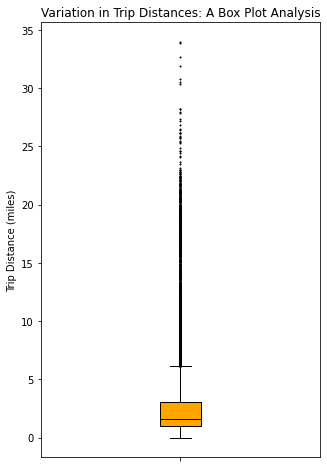

In [9]:
# Create box plot of trip_distance
plt.figure(figsize=(5,8))
plt.boxplot(x=df['trip_distance'], showfliers=True, flierprops=dict(markersize=1), labels=[''], patch_artist=True,boxprops=dict(facecolor='orange'),medianprops=dict(color='black'))
plt.ylabel('Trip Distance (miles)')
plt.title('Variation in Trip Distances: A Box Plot Analysis')
plt.show()

**Analysis:** Most of the trips are less then 3 miles, with 6 miles as the upper limit

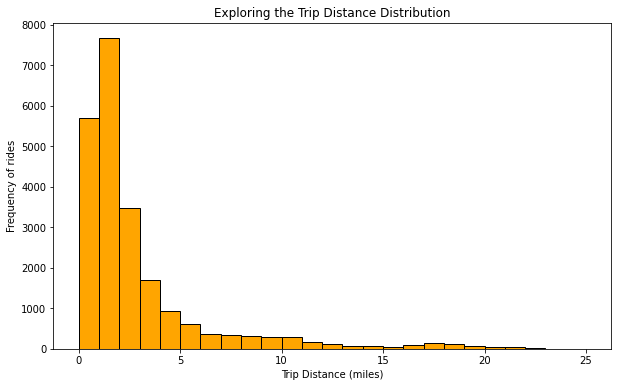

In [10]:
# Create histogram of trip_distance
plt.figure(figsize=(10,6))
plt.hist(x=df['trip_distance'],bins=range(0,26,1),color='orange', edgecolor='black')
plt.xlabel('Trip Distance (miles)')
plt.ylabel('Frequency of rides')
plt.title('Exploring the Trip Distance Distribution')
plt.show()

**Analysis:** Most of the trips are less then 3 miles, with 6 miles as the upper limit

**total amount**

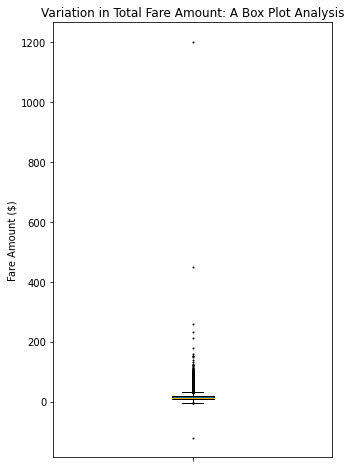

In [11]:
# Create box plot of total_amount
plt.figure(figsize=(5,8))
plt.boxplot(x=df['total_amount'],showfliers=True,flierprops=dict(markersize=1),labels=[''],patch_artist=True,boxprops=dict(facecolor='#006BA4'),medianprops=dict(color='orange'))
plt.ylabel('Fare Amount ($)')
plt.title('Variation in Total Fare Amount: A Box Plot Analysis')
plt.show()

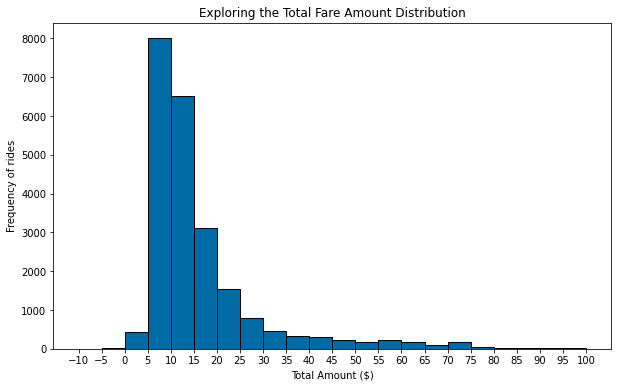

In [12]:
# Create histogram of total_amount
plt.figure(figsize=(10,6))
plt.hist(x=df['total_amount'],bins=range(-10,101,5),color='#006BA4', edgecolor='black')
plt.xticks(range(-10,101,5))
plt.xlabel('Total Amount ($)')
plt.ylabel('Frequency of rides')
plt.title('Exploring the Total Fare Amount Distribution')
plt.show()

**Analysis:** Some trips shows negative fares, most rides cost less than $20, with a peak between $5-$10. The maximum total amount for a ride were $1200.

**tip amount**

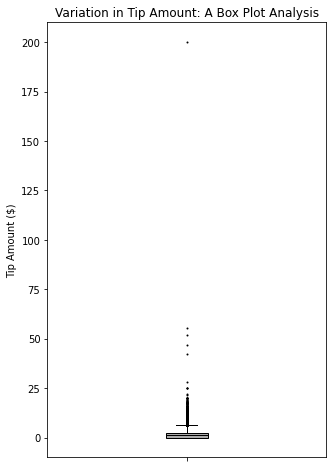

In [13]:
# Create box plot of tip_amount
plt.figure(figsize=(5,8))
plt.boxplot(x=df['tip_amount'],showfliers=True,flierprops=dict(markersize=1),labels=[''],patch_artist=True,boxprops=dict(facecolor='#ABABAB'),medianprops=dict(color='black'))
plt.ylabel('Tip Amount ($)')
plt.title('Variation in Tip Amount: A Box Plot Analysis')
plt.show()

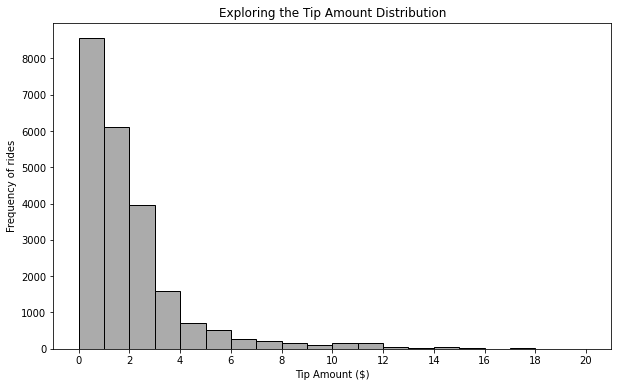

In [14]:
# Create histogram of tip_amount
plt.figure(figsize=(10,6))
plt.hist(x=df['tip_amount'],bins=range(0,21,1),color='#ABABAB', edgecolor='black')
plt.xticks(range(0,21,2))
plt.xlabel('Tip Amount ($)')
plt.ylabel('Frequency of rides')
plt.title('Exploring the Tip Amount Distribution')
plt.show()

**Anaysis:** Most rides recieved tip amount below $3, with a peak at $1. The maximum tip amount was $200.

**tip_amount by vendor**

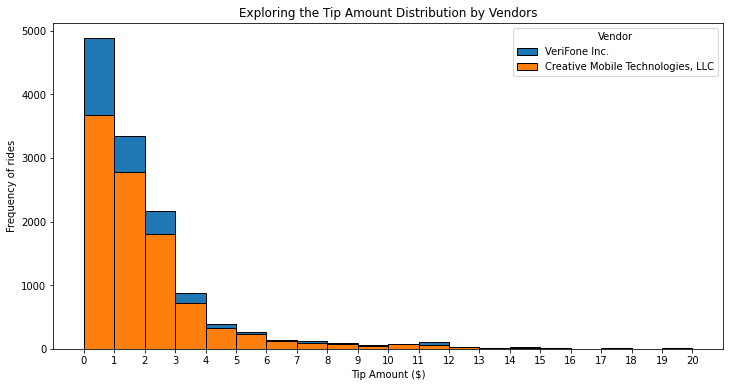

In [15]:
# Create histogram of tip_amount by vendor
plt.figure(figsize=(12,6))
vendor_names = {1: 'Creative Mobile Technologies, LLC', 2: 'VeriFone Inc.'}
for VendorID in df['VendorID'].unique():
    plt.hist(x=df['tip_amount'][df['VendorID']==VendorID], bins=range(0,21,1), label=vendor_names[VendorID],edgecolor='black')

plt.xticks(range(0,21,1))
plt.xlabel('Tip Amount ($)')
plt.ylabel('Frequency of rides')
plt.title('Exploring the Tip Amount Distribution by Vendors')
plt.legend(title='Vendor')
plt.show()

Next, zoom in on the upper end of the range of tips to check whether vendor one gets noticeably more of the most generous tips.

**Anaysis:** Verifone Inc. got more rides than CMT LLC, but the tip amounts recieved are consistent for both vendors.

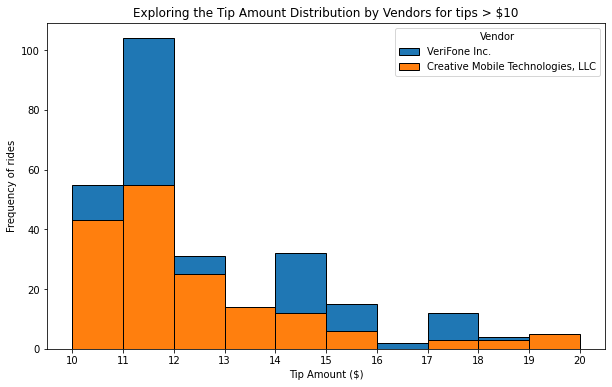

In [16]:
# Create histogram of tip_amount by vendor for tips > $10 
plt.figure(figsize=(10,6))
vendor_names = {1: 'Creative Mobile Technologies, LLC', 2: 'VeriFone Inc.'}
for VendorID in df['VendorID'].unique():
    plt.hist(x=df['tip_amount'][(df['VendorID']==VendorID) & (df['tip_amount']>10)], bins=range(10,21,1), label=vendor_names[VendorID],edgecolor='black')

plt.xticks(range(10,21,1))
plt.xlabel('Tip Amount ($)')
plt.ylabel('Frequency of rides')
plt.title('Exploring the Tip Amount Distribution by Vendors for tips > $10')
plt.legend(title='Vendor')
plt.show()

**Analysis:** Tip amounts are still consistent for both vendors, except for the highest tip of $20. Occurances of these events are stil less compared to the whole data.

**Mean tips by passenger count**

Examine the unique values in the `passenger_count` column.

In [16]:
df['passenger_count'].value_counts()

1    16117
2     3305
5     1143
3      953
6      693
4      455
0       33
Name: passenger_count, dtype: int64

In [17]:
# Calculate mean tips by passenger_count
tip_new_df = df['tip_amount'].groupby(df['passenger_count']).mean().reset_index()
tip_new_df
tip_new_df=tip_new_df[tip_new_df['passenger_count']!=0]

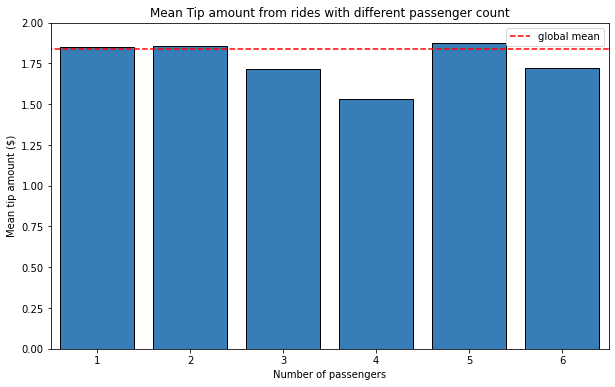

In [19]:
# Create bar plot for mean tips by passenger count
plt.figure(figsize=(10,6))
plt.bar(x=tip_new_df['passenger_count'], height=tip_new_df['tip_amount'],color=CB_color_cycle[0], edgecolor='black')
plt.hlines(df['tip_amount'].mean(),-1,8, ls='--', color='red', label='global mean')
plt.xticks(range(0,7,1))
plt.xlim(0.5, 6.5); plt.ylim(0, 2)
plt.xlabel('Number of passengers')
plt.ylabel('Mean tip amount ($)')
plt.title('Mean Tip amount from rides with different passenger count')
plt.legend(loc='upper right')
plt.show()

**Analysis:** The rides with 0 passengers are not included as they are illogical and also they are very less compared to other data.
The mean tip of all rides are consistent with the passenger count except for the passenger count of 4.

**Create month and day columns**

In [18]:
# Create a month column
df['month'] = df['tpep_pickup_datetime'].dt.month_name().str[:3]
df['month_num'] = df['tpep_pickup_datetime'].dt.month
# create a ordered list of values for making categorical values
sort_month = df[['month','month_num']].drop_duplicates().sort_values('month_num').reset_index(drop=True)
sort_month
# creating months as categorical values so that they can be sorted
df.month = pd.Categorical(df.month, categories=sort_month['month'],ordered=True)

# Create a day column
df['day'] = df['tpep_pickup_datetime'].dt.day_name()
df['day_num'] = df['tpep_pickup_datetime'].dt.dayofweek
# create a ordered list of values for making categorical values
sort_day = df[['day','day_num']].drop_duplicates().sort_values('day_num').reset_index(drop=True)
sort_day
# creating weekdays as categorical values so that they can be sorted
df.day = pd.Categorical(df.day, categories=sort_day['day'],ordered=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22699 entries, 0 to 22698
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Unnamed: 0             22699 non-null  int64         
 1   VendorID               22699 non-null  int64         
 2   tpep_pickup_datetime   22699 non-null  datetime64[ns]
 3   tpep_dropoff_datetime  22699 non-null  datetime64[ns]
 4   passenger_count        22699 non-null  int64         
 5   trip_distance          22699 non-null  float64       
 6   RatecodeID             22699 non-null  int64         
 7   store_and_fwd_flag     22699 non-null  object        
 8   PULocationID           22699 non-null  int64         
 9   DOLocationID           22699 non-null  int64         
 10  payment_type           22699 non-null  int64         
 11  fare_amount            22699 non-null  float64       
 12  extra                  22699 non-null  float64       
 13  m

**Plot total ride count by month**

Begin by calculating total ride count by month.

In [19]:
# Get total number of rides for each month
temp_df = df.groupby('month')['Unnamed: 0'].count().reset_index()
temp_df

,month,Unnamed: 0
0,Jan,1997
1,Feb,1769
2,Mar,2049
3,Apr,2019
4,May,2013
5,Jun,1964
6,Jul,1697
7,Aug,1724
8,Sep,1734
9,Oct,2027


Reorder the results to put the months in calendar order.

In [20]:
# Reorder the monthly ride list so months go in order
# ALready done

In [21]:
# Show the index
# Already done

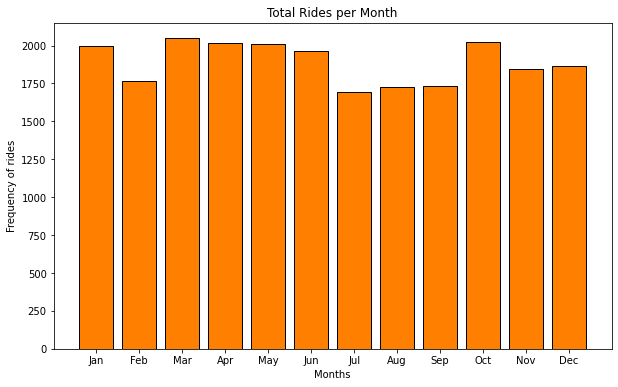

In [24]:
# Create a bar plot of total rides per month
plt.figure(figsize=(10,6))
plt.bar(x=temp_df['month'], height=temp_df['Unnamed: 0'],color=CB_color_cycle[1], edgecolor='black')
plt.xlabel('Months')
plt.ylabel('Frequency of rides')
plt.title('Total Rides per Month')
plt.show()

**Analysis:** The rides were booked consistentlly across the months. They were least for the months July, August, September and February.

**Plot total ride count by day**

Repeat the above process, but now calculate the total rides by day of the week.

In [22]:
# Repeat the above process, this time for rides by day
temp_df = df.groupby('day')['Unnamed: 0'].count().reset_index()
temp_df

,day,Unnamed: 0
0,Monday,2931
1,Tuesday,3198
2,Wednesday,3390
3,Thursday,3402
4,Friday,3413
5,Saturday,3367
6,Sunday,2998


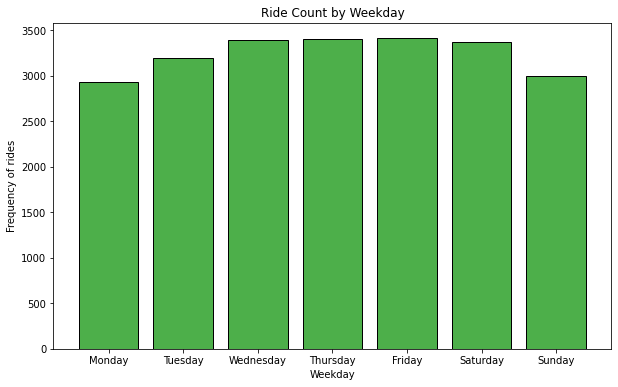

In [23]:
# Create bar plot for ride count by day
plt.figure(figsize=(10,6))
plt.bar(x=temp_df['day'], height=temp_df['Unnamed: 0'],color=CB_color_cycle[2], edgecolor='black')
plt.xlabel('Weekday')
plt.ylabel('Frequency of rides')
plt.title('Ride Count by Weekday')
plt.show()

**Analysis:** Most of the rides were booked on Wednesday, Thursday, friday and saturday. The least rides were booked on Sunday and Monday

**Plot total revenue by day of the week**

Repeat the above process, but now calculate the total revenue by day of the week.

In [24]:
# Repeat the process, this time for total revenue by day
temp_df = df.groupby('day')['total_amount'].sum().reset_index()
temp_df

,day,total_amount
0,Monday,49574.37
1,Tuesday,52527.14
2,Wednesday,55310.47
3,Thursday,57181.91
4,Friday,55818.74
5,Saturday,51195.40
6,Sunday,48624.06


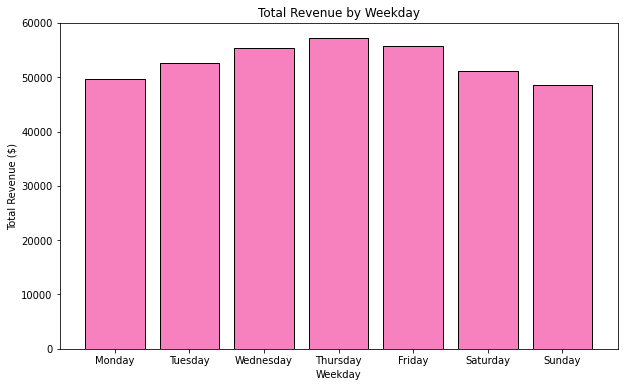

In [25]:
# Create bar plot of total revenue by day
plt.figure(figsize=(10,6))
plt.bar(x=temp_df['day'], height=temp_df['total_amount'],color=CB_color_cycle[3], edgecolor='black')
plt.xlabel('Weekday')
plt.ylabel('Total Revenue ($)')
plt.title('Total Revenue by Weekday')
plt.show()

**Analysis:** Most revenue was generated on Thursady, then Friday and Wednesday, and least on Sunday and Monday which is consistent with the number of rides booked on these days. But the rides on saturdays generated less revenue with the number of rides booked almost same as friday.

**Plot total revenue by month**

In [26]:
# Repeat the process, this time for total revenue by month
temp_df = df.groupby('month')['total_amount'].sum().reset_index()
temp_df

,month,total_amount
0,Jan,31735.25
1,Feb,28937.89
2,Mar,33085.89
3,Apr,32012.54
4,May,33828.58
5,Jun,32920.52
6,Jul,26617.64
7,Aug,27759.56
8,Sep,28206.38
9,Oct,33065.83


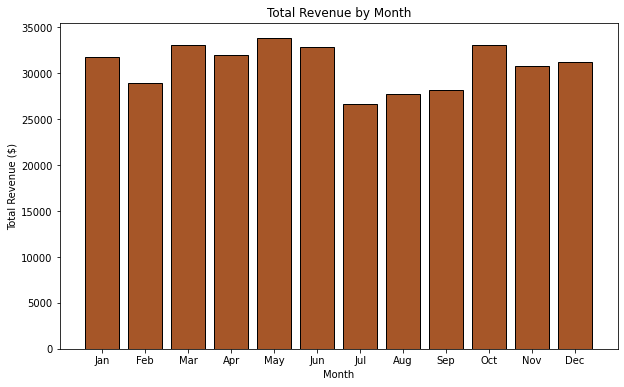

In [27]:
# Create a bar plot of total revenue by month
plt.figure(figsize=(10,6))
plt.bar(x=temp_df['month'], height=temp_df['total_amount'],color=CB_color_cycle[4], edgecolor='black')
plt.xlabel('Month')
plt.ylabel('Total Revenue ($)')
plt.title('Total Revenue by Month')
plt.show()

**Analysis:** The revenue generated monthwise is consistent with the number of rides booked in these months.

#### Scatter plot

You can create a scatterplot in Tableau Public, which can be easier to manipulate and present. If you'd like step by step instructions, you can review the following link. Those instructions create a scatterplot showing the relationship between total_amount and trip_distance. Consider adding the Tableau visualization to your executive summary, and adding key insights from your findings on those two variables.


**Tableau link:** https://public.tableau.com/app/profile/nitin.luhadiya/viz/NYCTLC_17146140834130/Sheet1 <br>
**Analysis:** The analysis of the scatter plot shows that there were few rides that had zero trip distance but showed, non-zero trip fare amount.

[Tableau visualization guidelines](https://docs.google.com/document/d/1pcfUlttD2Y_a9A4VrKPzikZWCAfFLsBAhuKuomjcUjA/template/preview)

**Plot mean trip distance by drop-off location**

In [29]:
# Get number of unique drop-off location IDs
len(df['DOLocationID'].unique())

216

In [30]:
# Calculate the mean trip distance for each drop-off location
temp_df = df.groupby(df['DOLocationID'])['trip_distance'].mean().reset_index(name='mean trip_distance')
temp_df['DOLocationID']=temp_df['DOLocationID'].astype(str)
# Sort the results in descending order by mean trip distance
temp_df = temp_df.sort_values(by='mean trip_distance',ascending=False).reset_index(drop=True)
temp_df

,DOLocationID,mean trip_distance
0,23,24.275000
1,29,21.650000
2,210,20.500000
3,11,17.945000
4,51,17.310000
...,...,...
211,137,1.818852
212,234,1.727806
213,237,1.555494
214,193,1.390556


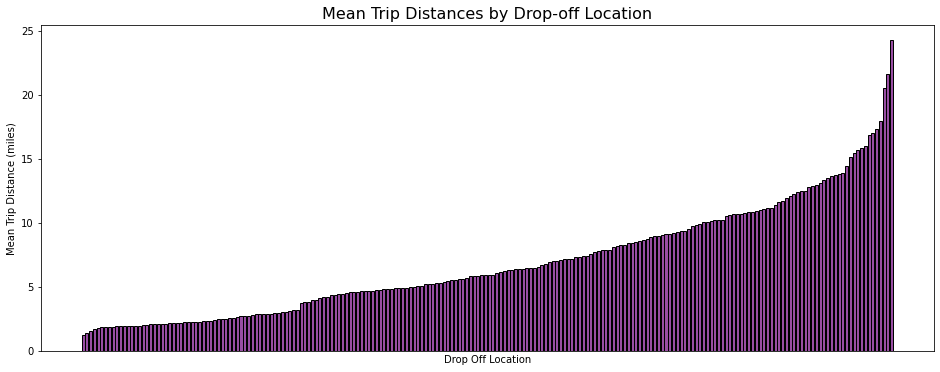

In [32]:
# Create a bar plot of mean trip distances by drop-off location in ascending order by distance
temp_df = temp_df.sort_values(by='mean trip_distance',ascending=True).reset_index(drop=True)
plt.figure(figsize=(16,6))
plt.bar(temp_df['DOLocationID'],temp_df['mean trip_distance'],color=CB_color_cycle[5], edgecolor='black')
plt.xlabel('Drop Off Location')
plt.ylabel('Mean Trip Distance (miles)')
plt.title('Mean Trip Distances by Drop-off Location', fontsize=16)
plt.xticks([])
plt.show()

## BONUS CONTENT

To confirm your conclusion, consider the following experiment:
1. Create a sample of coordinates from a normal distribution&mdash;in this case 1,500 pairs of points from a normal distribution with a mean of 10 and a standard deviation of 5
2. Calculate the distance between each pair of coordinates 
3. Group the coordinates by endpoint and calculate the mean distance between that endpoint and all other points it was paired with
4. Plot the mean distance for each unique endpoint

In [33]:
#BONUS CONTENT

#1. Generate random points on a 2D plane from a normal distribution
mean = 10
sd = 5
size = (1500,2)
np.random.normal(mean, sd, size)

# 2. Calculate Euclidean distances between points in first half and second half of array
#==> ENTER YOUR CODE HERE

# 3. Group the coordinates by "drop-off location", compute mean distance
#==> ENTER YOUR CODE HERE

# 4. Plot the mean distance between each endpoint ("drop-off location") and all points it connected to
#==> ENTER YOUR CODE HERE

array([[ 4.92222634,  5.05907133],
       [ 3.34253168,  6.41767126],
       [11.1495234 , 10.4547616 ],
       ...,
       [ 3.29780618,  8.48696075],
       [15.60081367,  3.52878971],
       [11.28169263, 11.06199979]])

**Histogram of rides by drop-off location**

First, check to whether the drop-off locations IDs are consecutively numbered. For instance, does it go 1, 2, 3, 4..., or are some numbers missing (e.g., 1, 3, 4...). If numbers aren't all consecutive, the histogram will look like some locations have very few or no rides when in reality there's no bar because there's no location. 

In [34]:
# Check if all drop-off locations are consecutively numbered
df['DOLocationID'].max() - len(df['DOLocationID'].unique())

49

To eliminate the spaces in the historgram that these missing numbers would create, sort the unique drop-off location values, then convert them to strings. This will make the histplot function display all bars directly next to each other. 

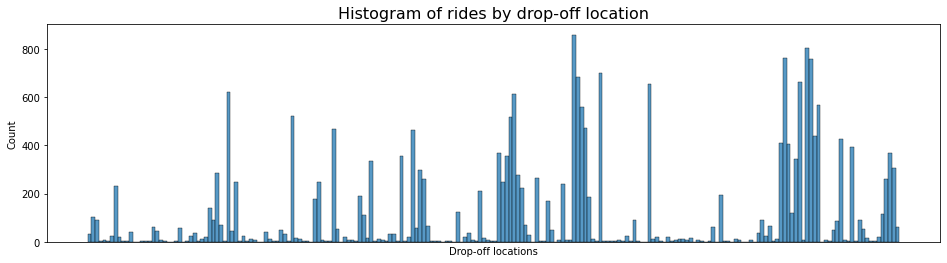

In [35]:
# There are 49 numbers missing

# DOLocationID column is numeric, so sort in ascending order
sorted_dropoffs = df['DOLocationID'].sort_values()

# Convert to string
sorted_dropoffs = sorted_dropoffs.astype('str')

# Plot
plt.figure(figsize=(16,4))
ax = sns.histplot(sorted_dropoffs,bins=range(0, df['DOLocationID'].max()+1, 1))
plt.xticks([])
plt.xlabel('Drop-off locations')
plt.title('Histogram of rides by drop-off location', fontsize=16);
plt.show()

**Analysis:** Some drop-off locations are more active than other, these could be tourist attraction, transportation places (railways, bus station, airports)

<img src="images/Execute.png" width="100" height="100" align=left>

## PACE: Execute 

Consider the questions in your PACE Strategy Document to reflect on the Execute stage.

### Task 4a. Results and evaluation

Having built visualizations in Tableau and in Python, what have you learned about the dataset? What other questions have your visualizations uncovered that you should pursue? 

***Pro tip:*** Put yourself in your client's perspective, what would they want to know? 

Use the following code fields to pursue any additional EDA based on the visualizations you've already plotted. Also use the space to make sure your visualizations are clean, easily understandable, and accessible. 

***Ask yourself:*** Did you consider color, contrast, emphasis, and labeling?



Yes, i had considered the color contrast and labeling

I have learned that most rides are below 6 miles and the maximum trip distance is of 35 miles. Also, most rides costs belo $20, but the maximum value is of $1200.

My other questions are why few trips shows 0 trip distance and still charge non zero fare

My client would likely want to know about the trip durations also. Do they affect the fare prices. when the trip durations are highest chronologically.

In [36]:
df['trip_duration'] = (df['tpep_dropoff_datetime']-df['tpep_pickup_datetime'])

In [37]:
df.head(10)

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,...,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,month,month_num,day,day_num,trip_duration
0,24870114,2,2017-03-25 08:55:43,2017-03-25 09:09:47,6,3.34,1,N,100,231,...,0.5,2.76,0.0,0.3,16.56,Mar,3,Saturday,5,0 days 00:14:04
1,35634249,1,2017-04-11 14:53:28,2017-04-11 15:19:58,1,1.80,1,N,186,43,...,0.5,4.00,0.0,0.3,20.80,Apr,4,Tuesday,1,0 days 00:26:30
2,106203690,1,2017-12-15 07:26:56,2017-12-15 07:34:08,1,1.00,1,N,262,236,...,0.5,1.45,0.0,0.3,8.75,Dec,12,Friday,4,0 days 00:07:12
3,38942136,2,2017-05-07 13:17:59,2017-05-07 13:48:14,1,3.70,1,N,188,97,...,0.5,6.39,0.0,0.3,27.69,May,5,Sunday,6,0 days 00:30:15
4,30841670,2,2017-04-15 23:32:20,2017-04-15 23:49:03,1,4.37,1,N,4,112,...,0.5,0.00,0.0,0.3,17.80,Apr,4,Saturday,5,0 days 00:16:43
5,23345809,2,2017-03-25 20:34:11,2017-03-25 20:42:11,6,2.30,1,N,161,236,...,0.5,2.06,0.0,0.3,12.36,Mar,3,Saturday,5,0 days 00:08:00
6,37660487,2,2017-05-03 19:04:09,2017-05-03 20:03:47,1,12.83,1,N,79,241,...,0.5,9.86,0.0,0.3,59.16,May,5,Wednesday,2,0 days 00:59:38
7,69059411,2,2017-08-15 17:41:06,2017-08-15 18:03:05,1,2.98,1,N,237,114,...,0.5,1.78,0.0,0.3,19.58,Aug,8,Tuesday,1,0 days 00:21:59
8,8433159,2,2017-02-04 16:17:07,2017-02-04 16:29:14,1,1.20,1,N,234,249,...,0.5,0.00,0.0,0.3,9.80,Feb,2,Saturday,5,0 days 00:12:07
9,95294817,1,2017-11-10 15:20:29,2017-11-10 15:40:55,1,1.60,1,N,239,237,...,0.5,2.75,0.0,0.3,16.55,Nov,11,Friday,4,0 days 00:20:26


### Task 4b. Conclusion
*Make it professional and presentable*

You have visualized the data you need to share with the director now. Remember, the goal of a data visualization is for an audience member to glean the information on the chart in mere seconds.

*Questions to ask yourself for reflection:*
Why is it important to conduct Exploratory Data Analysis? Why are the data visualizations provided in this notebook useful?


* EDA is important because it helps a data professional to get to know the data, understand its outliers, clean its missing values, and prepare it for future modeling.

* Visualizations helped me understand that this dataset has some outliers that we will need to make decisions on prior to designing a model.

You’ve now completed professional data visualizations according to a business need. Well done! 

**Congratulations!** You've completed this lab. However, you may not notice a green check mark next to this item on Coursera's platform. Please continue your progress regardless of the check mark. Just click on the "save" icon at the top of this notebook to ensure your work has been logged.